In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import poisson
from scipy.stats import norm
from scipy.optimize import minimize

In [67]:
data = pd.read_csv('accidents.csv', index_col=0)

(array([3334., 2265., 1809., 1240.,  743.,  363.,  154.,   64.,   23.,
           5.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

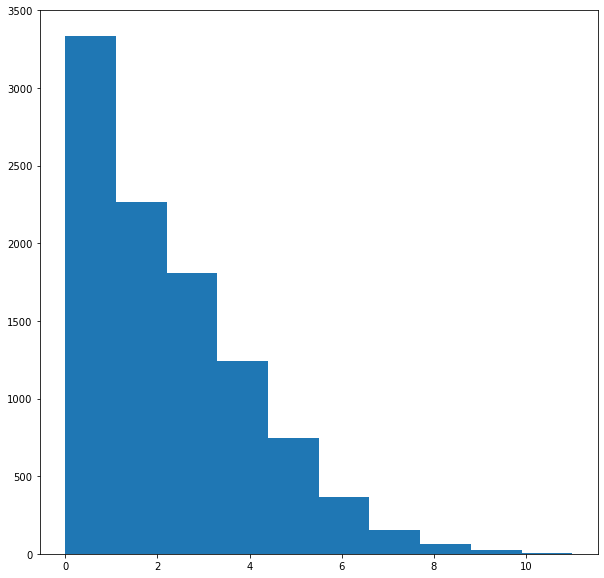

In [68]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.hist(data)

In [78]:
# calculate estimator

def bootstrap_CI(X, m, alpha):
    # returns two-sided 
    n = len(X)
    X_resample = np.random.choice(X, size=(m,n))
    mles = np.mean(X_resample, axis=1)
    lower_bound = np.percentile(mles, alpha / 2)
    upper_bound = np.percentile(mles, 100 - alpha/2)
    return (lower_bound, upper_bound)


def likelihood(X, lam):
    return -np.sum(np.log(poisson.pmf(X, lam)))


def bootstrap_CI2(X, m, alpha):
    # returns two-sided 
    n = len(X)
    X_resample = np.random.choice(X, size=(m,n))
    mles = np.zeros(m)
    for i in range(m):
        f = lambda x: likelihood(X_resample[i,:], x[0])
        res = minimize(f, [1], bounds=((0, None),))
        mles[i] = res.x
    lower_bound = np.percentile(mles, alpha / 2)
    upper_bound = np.percentile(mles, 100 - alpha/2)
    return (lower_bound, upper_bound)

likelihood(data['values'], 1)
np.random.seed(1)
print(bootstrap_CI(data['values'], 10, .05))
np.random.seed(1)
print(bootstrap_CI2(data['values'], 10, .05))


(2.4393495, 2.5210298)
(2.4393493493941265, 2.5210298383761187)


In [33]:
# compare this to normal ci

def normal_ci(X, alpha):
    n = len(X)
    x_bar = np.mean(X)
    s2 = np.var(X)
    z_alpha = norm.ppf(1 - alpha / 200)
    lower_bound = x_bar - z_alpha * s2 / np.sqrt(n)
    upper_bound = x_bar + z_alpha * s2 / np.sqrt(n)
    return (lower_bound, upper_bound)

normal_ci(data['values'], 5)

(2.416413566642629, 2.5401864333573707)

In [66]:
data['values']

0     0.142735
1     0.097307
2     0.255683
3     0.086613
4     0.286634
5     0.339763
6     0.470815
7    -0.302788
8     0.178047
9     0.327425
10    0.278122
11    0.441079
12    0.904735
13    0.453307
14    0.568046
Name: values, dtype: float64